<a href="https://www.kaggle.com/code/victoraesthete/feature-engineering-normalization?scriptVersionId=117851813" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset/wine_dataset.csv


# Normalization

In [2]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset and taking required column
df=pd.read_csv('/kaggle/input/wine-dataset/wine_dataset.csv',usecols=[2,10,11])
df.columns=['Citeric Acid','Alcohol','Quality']
df.head()

,Citeric Acid,Alcohol,Quality
0,0.00,9.4,5
1,0.00,9.8,5
2,0.04,9.8,5
3,0.56,9.8,6
4,0.00,9.4,5


# Plot of Features 

<AxesSubplot:xlabel='Citeric Acid', ylabel='Density'>

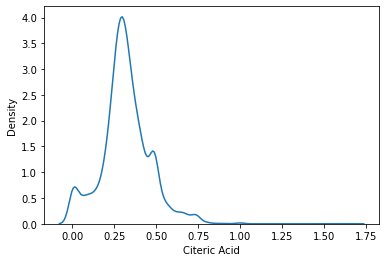

In [4]:
sns.kdeplot(df['Citeric Acid'])

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

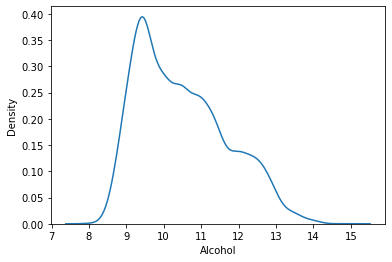

In [5]:
sns.kdeplot(df['Alcohol'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Citeric Acid', ylabel='Alcohol'>

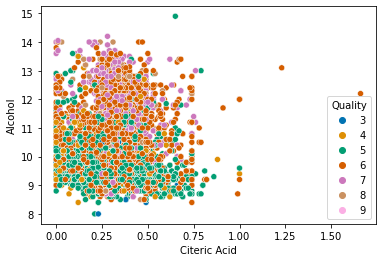

In [6]:
sns.scatterplot(df['Citeric Acid'],df['Alcohol'],df['Quality'],palette='colorblind')

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df.drop('Quality',axis=1),df['Quality'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((4547, 2), (1950, 2))

# Normalization: 1.MinMax Scaler

# X'=$\frac{X-Xmin}{Xmax - Xmin}$


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# fit scaler to train set
scaler.fit(X_train)

# Transformation
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


# Convering into DataFrame

In [9]:
# After scaling it gets converted into numpy array. So,conversion required
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
np.round(X_train.describe(),1)

,Citeric Acid,Alcohol
count,4547.0,4547.0
mean,0.3,10.5
std,0.1,1.2
min,0.0,8.0
25%,0.2,9.5
50%,0.3,10.3
75%,0.4,11.3
max,1.7,14.9


In [11]:
np.round(X_train_scaled.describe(),1)

,Citeric Acid,Alcohol
count,4547.0,4547.0
mean,0.2,0.4
std,0.1,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.2,0.3
75%,0.2,0.5
max,1.0,1.0


# Checking Effect of scaling

[]

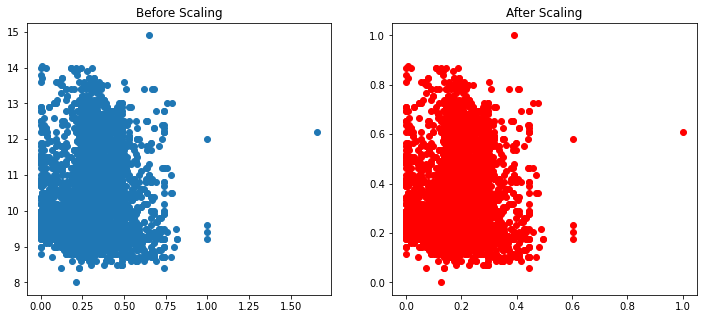

In [12]:
#Plotting Scatter Plot
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Citeric Acid'],X_train['Alcohol'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Citeric Acid'], X_train_scaled['Alcohol'],color='red')
ax2.set_title("After Scaling")
plt.plot()

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Citeric Acid', ylabel='Density'>

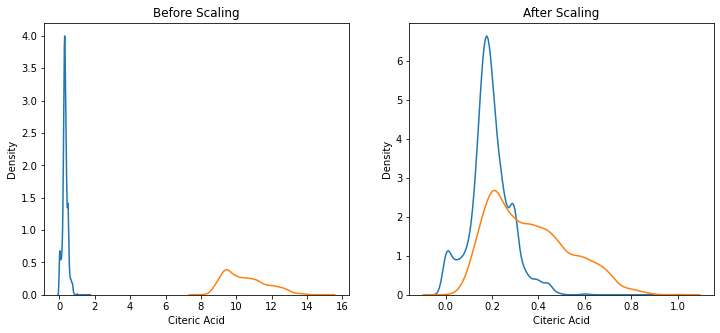

In [13]:
# PLotting standard Deviation PLot Before and After Scaling
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Citeric Acid"],ax=ax1)
sns.kdeplot(X_train["Alcohol"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Citeric Acid"],ax=ax2)
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Citeric Acid', ylabel='Density'>

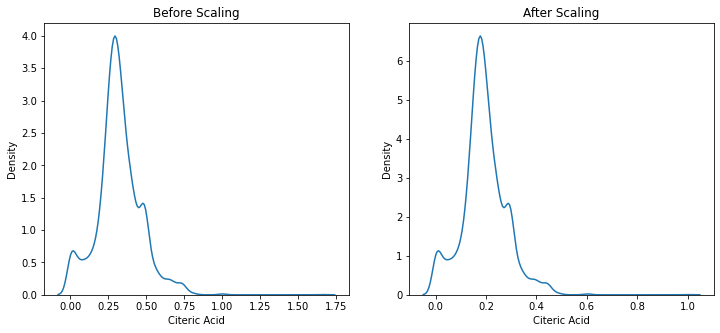

In [14]:
#Plotting Subplot for Citeric Acid
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Citeric Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Citeric Acid'],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

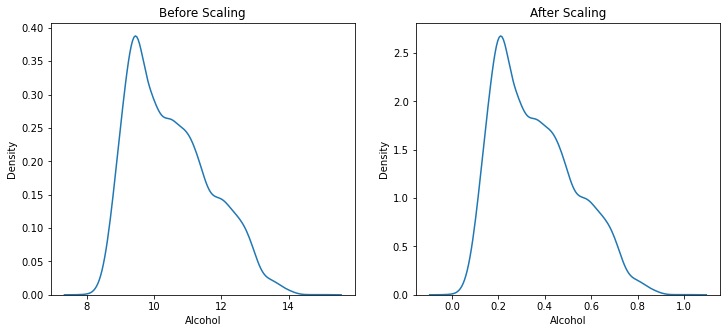

In [15]:
#Plotting Subplot for Alcohol
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)

# Normalization: 2.Robust Scaling

# X'=$\frac{X-Xmed}{X75-X25}$


In [16]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

# fit scaler to train set
scaler.fit(X_train)

# Transformation
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

# Converting into DataFrame

In [17]:
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
np.round(X_train.describe(),1)

,Citeric Acid,Alcohol
count,4547.0,4547.0
mean,0.3,10.5
std,0.1,1.2
min,0.0,8.0
25%,0.2,9.5
50%,0.3,10.3
75%,0.4,11.3
max,1.7,14.9


In [19]:
# Interquartile (50%) set to 0
np.round(X_train_scaled.describe(),1)

,Citeric Acid,Alcohol
count,4547.0,4547.0
mean,0.1,0.1
std,1.0,0.7
min,-2.1,-1.3
25%,-0.4,-0.4
50%,0.0,0.0
75%,0.6,0.6
max,9.0,2.6


# Checking Effect of Scaling

[]

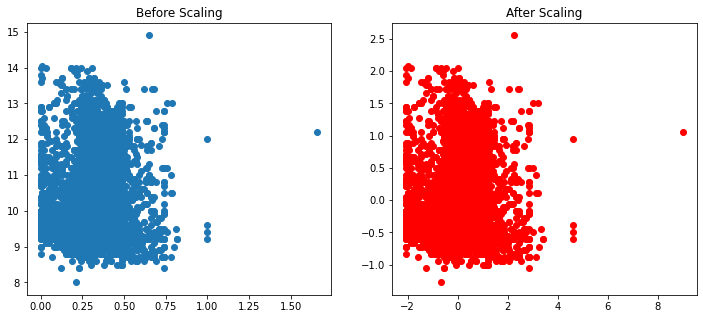

In [20]:
#Plotting Scatter Plot
fig, (ax1, ax2)=plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Citeric Acid'],X_train['Alcohol'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Citeric Acid'], X_train_scaled['Alcohol'],color='red')
ax2.set_title("After Scaling")
plt.plot()

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Citeric Acid', ylabel='Density'>

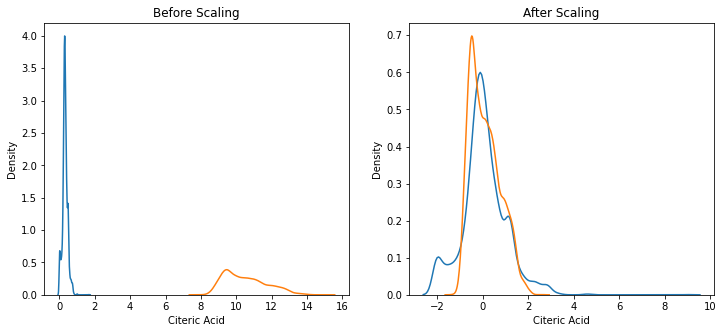

In [21]:
# PLotting standard Deviation PLot Before and After Scaling
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Citeric Acid"],ax=ax1)
sns.kdeplot(X_train["Alcohol"],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled["Citeric Acid"],ax=ax2)
sns.kdeplot(X_train_scaled["Alcohol"],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Citeric Acid', ylabel='Density'>

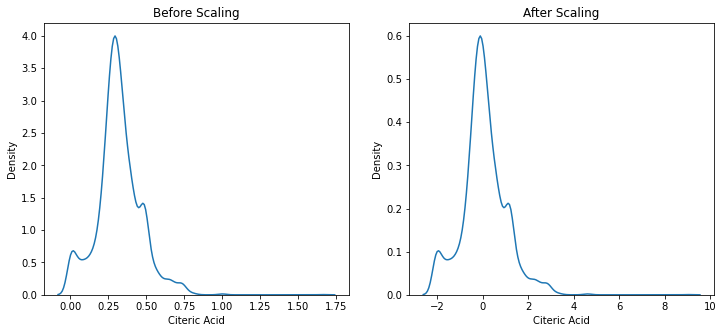

In [22]:
#Plotting Subplot for Citeric Acid
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Citeric Acid'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Citeric Acid'],ax=ax2)

<AxesSubplot:title={'center':'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

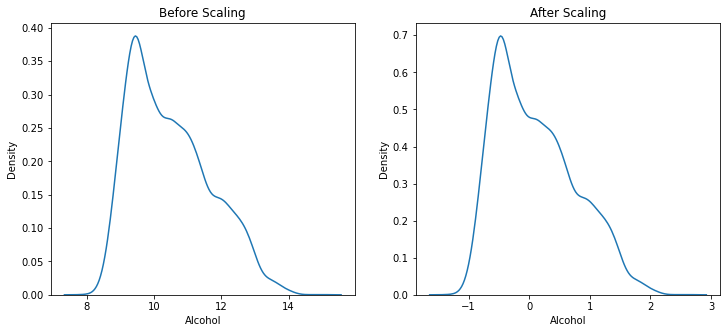

In [23]:
#Plotting Subplot for Alcohol
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)